In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10 as cf10

In [3]:
(train_images, train_labels), (test_images, test_labels) = cf10.load_data()

In [4]:
# Reduce dataset size to 1/5 of the original to avoid memory overload during image resizing
train_images, train_labels = train_images[:10000], train_labels[:10000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

In [5]:
# Flatten the labels arrays to remove the extra dimension
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

In [6]:
# Check shapes before resizing
print("Original Shapes:")
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

Original Shapes:
(10000, 32, 32, 3)
(10000,)
(1000, 32, 32, 3)
(1000,)


In [7]:
# Pad the images
train_images = np.pad(train_images, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')
test_images = np.pad(test_images, ((0, 0), (2, 2), (2, 2), (0, 0)), 'constant')

# Check the new shapes after padding
print("Updated Image Shapes:")
print(f"Training set: {train_images.shape}")  
print(f"Test set: {test_images.shape}")       

Updated Image Shapes:
Training set: (10000, 36, 36, 3)
Test set: (1000, 36, 36, 3)


In [8]:
# One-hot encode the labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_labels = to_categorical(train_labels, len(class_names))
test_labels = to_categorical(test_labels, len(class_names))

In [9]:
# Normalize image data: pixel values scaled between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [10]:
# Define a function to resize images to 227x227
def resize_images(images):
    return tf.image.resize(images, [227, 227])

# Resize both train and test images
train_images = resize_images(train_images)
test_images = resize_images(test_images)

# Check shapes after resizing
print("\nResized Shapes:")
print(train_images.shape)
print(test_images.shape)


Resized Shapes:
(10000, 227, 227, 3)
(1000, 227, 227, 3)


In [11]:
# Verify the dataset after preprocessing
print(f"Training Data Shape: {train_images.shape}, Training Labels Shape: {train_labels.shape}")
print(f"Test Data Shape: {test_images.shape}, Test Labels Shape: {test_labels.shape}")

Training Data Shape: (10000, 227, 227, 3), Training Labels Shape: (10000, 10)
Test Data Shape: (1000, 227, 227, 3), Test Labels Shape: (1000, 10)


In [12]:
# Variables for AlexNet architecture
INPUT_SHAPE = (227, 227, 3)  
FILTER1_SIZE = 96
FILTER2_SIZE = 256
FILTER3_SIZE = 384
FILTER4_SIZE = 384
FILTER5_SIZE = 256
FILTER_SHAPE1 = (11, 11)
FILTER_SHAPE2 = (5, 5)
FILTER_SHAPE3 = (3, 3)
POOL_SHAPE = (3, 3)
POOL_STRIDE = (2, 2)
FULLY_CONNECT_NUM1 = 4096
FULLY_CONNECT_NUM2 = 4096
NUM_CLASSES = len(class_names)

In [15]:
# Define the AlexNet architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(FILTER1_SIZE, FILTER_SHAPE1, strides=(4, 4), padding='same', activation='relu',input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOL_SHAPE, strides=POOL_STRIDE, padding='same'))

# 2nd Convolutional Layer
model.add(Conv2D(FILTER2_SIZE, FILTER_SHAPE2, strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOL_SHAPE, strides=POOL_STRIDE, padding='same'))

# 3rd Convolutional Layer
model.add(Conv2D(FILTER3_SIZE, FILTER_SHAPE3, strides=(1, 1), padding='same', activation='relu'))

# 4th Convolutional Layer
model.add(Conv2D(FILTER4_SIZE, FILTER_SHAPE3, strides=(1, 1), padding='same', activation='relu'))

# 5th Convolutional Layer
model.add(Conv2D(FILTER5_SIZE, FILTER_SHAPE3, strides=(1, 1), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOL_SHAPE, strides=POOL_STRIDE, padding='same'))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(FULLY_CONNECT_NUM1, activation='relu'))
model.add(Dropout(0.5))

# Fully connected layer 2
model.add(Dense(FULLY_CONNECT_NUM2, activation='relu'))
model.add(Dropout(0.5))

# Output layer (for 10 classes)
model.add(Dense(NUM_CLASSES, activation='softmax'))

import tensorflow as tf
alexnet_optimizer=tf.optimizers.SGD(learning_rate=0.001)

model.compile(loss='sparse_categorical_crossentropy',optimizer=alexnet_optimizer,metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 57, 57, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 57, 57, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 29, 29, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 29, 29, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 29, 29, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 15, 15, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 15, 15, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 15, 15, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4096)           │    67,112,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,684,874 (334.49 MB)

 Trainable params: 87,683,658 (334.49 MB)

 Non-trainable params: 1,216 (4.75 KB)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

BATCH_SIZE = 32
EPOCHS = 5

METRICS = metrics=['accuracy', 
                   Precision(name='precision'),
                   Recall(name='recall')]

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = METRICS)

# Train the model
training_history = model.fit(train_images, train_labels, 
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_data=(test_images, test_labels), verbose=1)

Epoch 1/5
 35/313 ━━━━━━━━━━━━━━━━━━━━ 10:23 2s/step - accuracy: 0.1233 - loss: 26.9892 - precision: 0.1293 - recall: 0.1094

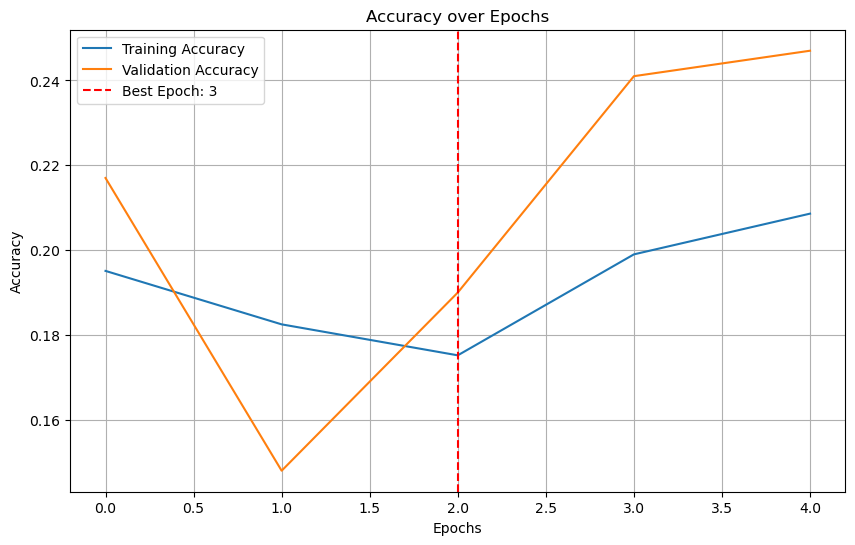

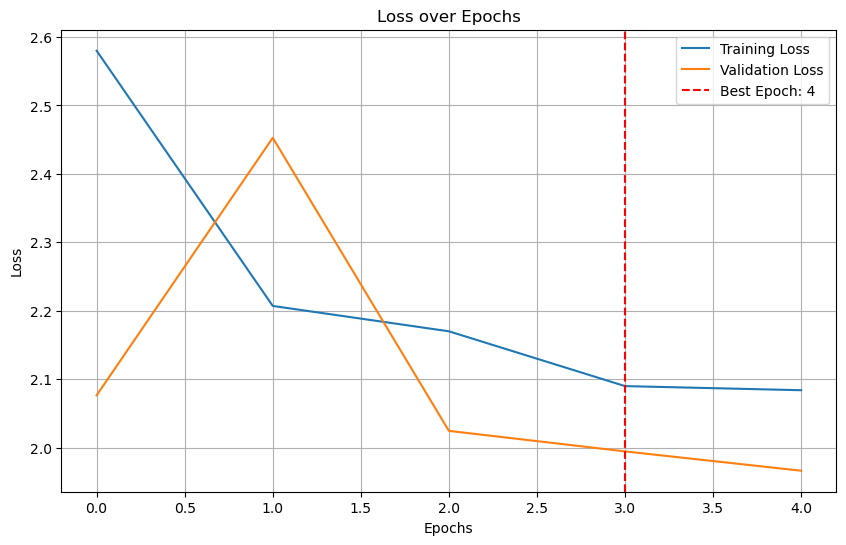

In [20]:
def show_performance_curve(training_result, metric, metric_label):
    train_perf = training_result.history[str(metric)]
    validation_perf = training_result.history['val_'+str(metric)]
    
    # Find the index where training and validation metrics are closest
    intersection_idx = np.argmin(np.abs(np.array(train_perf) - np.array(validation_perf)))
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_perf, label=f'Training {metric_label}')
    plt.plot(validation_perf, label=f'Validation {metric_label}')
    
    # Highlight the closest intersection point between training and validation curves
    plt.axvline(x=intersection_idx, color='r', linestyle='--', label=f'Best Epoch: {intersection_idx+1}')
    plt.xlabel('Epochs')
    plt.ylabel(metric_label)
    plt.title(f'{metric_label} over Epochs')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot the accuracy curve
show_performance_curve(training_history, 'accuracy', 'Accuracy')

# Plot the loss curve
show_performance_curve(training_history, 'loss', 'Loss')

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 331ms/step


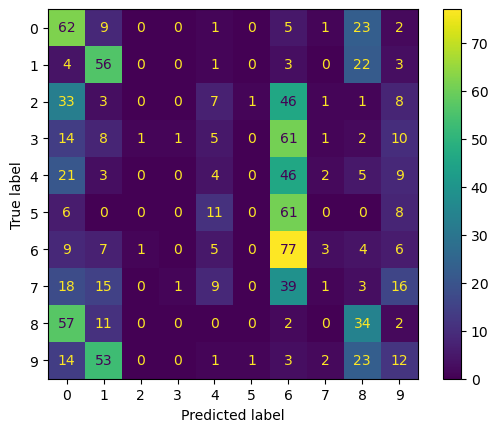

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtain the model's predictions on the test dataset
test_predictions = model.predict(test_images)

# Convert predictions from probabilities to class labels
test_predicted_labels = np.argmax(test_predictions, axis=1)

# Convert one-hot encoded true labels back to class labels
test_true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Create a ConfusionMatrixDisplay instance
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()